In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
# creating a dataframe
df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [10]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

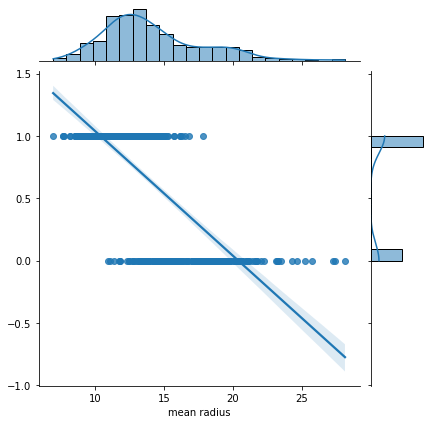

In [11]:
sns.jointplot(y=cancer['target'],x=df_feat['mean radius'],kind='reg')

<AxesSubplot:>

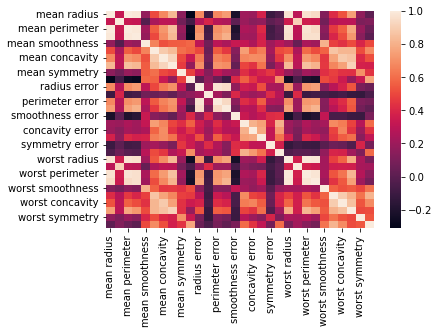

In [12]:
sns.heatmap(df_feat.corr())

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df_feat
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC()

In [31]:
model.fit(X_train,y_train)

SVC()

In [32]:
predictions = model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 59  12]
 [  3 114]]


              precision    recall  f1-score   support

           0       0.95      0.83      0.89        71
           1       0.90      0.97      0.94       117

    accuracy                           0.92       188
   macro avg       0.93      0.90      0.91       188
weighted avg       0.92      0.92      0.92       188



In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'C': [0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [38]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [39]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.623 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.632 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.632 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.632 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.632 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.623 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.632 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.632 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.632 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.632 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.623 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [40]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [41]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [42]:
grid_predictions = grid.predict(X_test)

In [44]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 63   8]
 [  4 113]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.91        71
           1       0.93      0.97      0.95       117

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188



In [45]:
from sklearn.metrics import plot_confusion_matrix

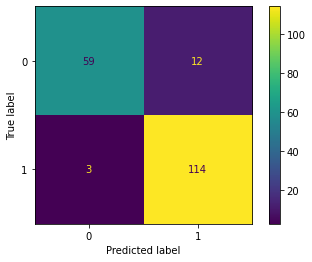

In [50]:
plot_confusion_matrix(model, X_test, y_test)

In [58]:
# row_to_predict = *write down the row # here*

print(grid.predict(X.iloc[[0]]))

[0]
